In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\Sweden_dataframe_2018.csv')

In [3]:
# new data frame with split dates column
new_df = df["CET_TimeStamp"].str.split(" ", n=1, expand=True)

In [4]:
df["Date"]= new_df[0]
df["Hour"] = new_df[1]

In [5]:
df.head()

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour
0,01.01.2018 01:00,2498.0,26.33,454.0,446.0,2044.0,01.01.2018,01:00
1,01.01.2018 02:00,2431.0,26.43,432.0,430.0,1999.0,01.01.2018,02:00
2,01.01.2018 03:00,2402.0,26.10,440.0,432.0,1962.0,01.01.2018,03:00
3,01.01.2018 04:00,2358.0,24.70,473.0,431.0,1885.0,01.01.2018,04:00
4,01.01.2018 05:00,2385.0,24.74,463.0,464.0,1922.0,01.01.2018,05:00


In [6]:
df.drop(columns=['CET_TimeStamp'])

,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour
0,2498.0,26.33,454.0,446.0,2044.0,01.01.2018,01:00
1,2431.0,26.43,432.0,430.0,1999.0,01.01.2018,02:00
2,2402.0,26.10,440.0,432.0,1962.0,01.01.2018,03:00
3,2358.0,24.70,473.0,431.0,1885.0,01.01.2018,04:00
4,2385.0,24.74,463.0,464.0,1922.0,01.01.2018,05:00
5,2441.0,18.01,511.0,533.0,1930.0,01.01.2018,06:00
6,2489.0,17.78,589.0,600.0,1900.0,01.01.2018,07:00
7,2487.0,17.80,696.0,690.0,1791.0,01.01.2018,08:00
8,2478.0,19.76,786.0,799.0,1692.0,01.01.2018,09:00
9,2502.0,20.73,887.0,880.0,1615.0,01.01.2018,10:00


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
CET_TimeStamp                       8761 non-null object
Actual_Total_Load                   8761 non-null float64
Day_Ahead_Price                     8761 non-null float64
Wind_Onshore_Gen_Actual             8761 non-null float64
Wind_Onshore_generation_forecast    8761 non-null float64
Residual_load                       8761 non-null float64
Date                                8761 non-null datetime64[ns]
Hour                                8761 non-null object
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 547.6+ KB


In [9]:
# create variables for month
df['month'] = df['Date'].dt.month_name()
df

,CET_TimeStamp,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load,Date,Hour,month
0,01.01.2018 01:00,2498.0,26.33,454.0,446.0,2044.0,2018-01-01,01:00,January
1,01.01.2018 02:00,2431.0,26.43,432.0,430.0,1999.0,2018-01-01,02:00,January
2,01.01.2018 03:00,2402.0,26.10,440.0,432.0,1962.0,2018-01-01,03:00,January
3,01.01.2018 04:00,2358.0,24.70,473.0,431.0,1885.0,2018-01-01,04:00,January
4,01.01.2018 05:00,2385.0,24.74,463.0,464.0,1922.0,2018-01-01,05:00,January
5,01.01.2018 06:00,2441.0,18.01,511.0,533.0,1930.0,2018-01-01,06:00,January
6,01.01.2018 07:00,2489.0,17.78,589.0,600.0,1900.0,2018-01-01,07:00,January
7,01.01.2018 08:00,2487.0,17.80,696.0,690.0,1791.0,2018-01-01,08:00,January
8,01.01.2018 09:00,2478.0,19.76,786.0,799.0,1692.0,2018-01-01,09:00,January
9,01.01.2018 10:00,2502.0,20.73,887.0,880.0,1615.0,2018-01-01,10:00,January


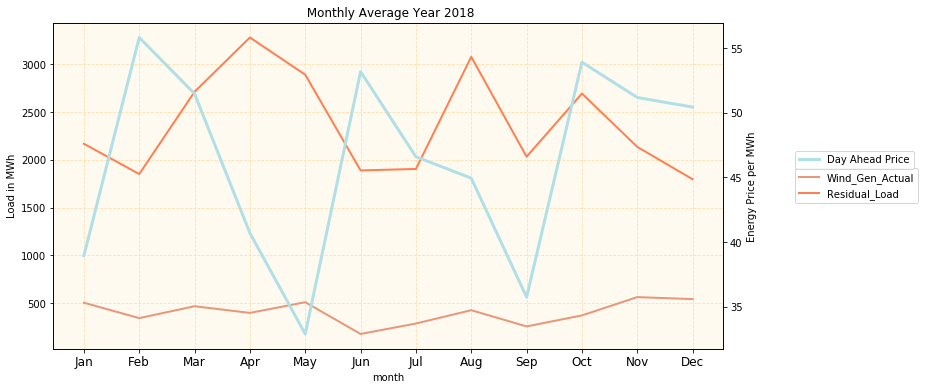

In [45]:
# Set the width and height of the figure
plt.figure(figsize=(12,6))

# Add title
plt.title(" Monthly Average Year 2018")

Price =  df.groupby('month')['Day_Ahead_Price'].agg(np.mean)



Wind_Generation = df.groupby('month')['Wind_Onshore_Gen_Actual'].agg(np.mean)
ax = sns.lineplot(x=Wind_Generation.index, y=Wind_Generation.values, color="darksalmon", linewidth=2, label='Wind_Gen_Actual')
Residual_load = df.groupby('month')['Residual_load'].agg(np.mean)
ax = sns.lineplot(x=Residual_load.index, y=Residual_load.values, color="coral", linewidth=2, label='Residual_Load')

plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=12)
plt.ylabel('Load in MWh')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_facecolor('floralwhite')
plt.grid(color = 'navajowhite',linestyle='--')

ax2 = ax.twinx()
sns.lineplot(x=Price.index, y=Price.values, color="powderblue", linewidth=3, label='Day Ahead Price')

plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, fontsize=12)
plt.ylabel('Energy Price per MWh')

# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.58))

In [12]:
#df.to_csv('Heatmap_dataframe2018.csv')

In [13]:
### Heatmap

In [3]:
df1 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2018_month_Price.csv')
df2 = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2018_month_Load.csv')
df_residual = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2018_month_residual_load.csv')
df_wind_act = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2018_month_wind_actual.csv')
df_wind_for = pd.read_csv('D:\DE_Jacobs University\Spring 2020\Advance Project I\Dataframe\heatmap2018_month_wind_forecast.csv')

In [4]:
df1 = df1.set_index('Hour')
df2 = df2.set_index('Hour')
df_residual = df_residual.set_index('Hour')
df_wind_act = df_wind_act.set_index('Hour')
df_wind_for = df_wind_for.set_index('Hour')

In [6]:
Price1 =  df1.groupby('Hour').agg(np.mean)
Load = df2.groupby('Hour').agg(np.mean)
res_load = df_residual.groupby('Hour').agg(np.mean)
wind_act = df_wind_act.groupby('Hour').agg(np.mean)
wind_for = df_wind_for.groupby('Hour').agg(np.mean)

In [7]:
time = []
for i in range(24):
    if i < 10:
        time.append("0"+str(i)+":00")
    elif i >= 10:
        time.append(str(i)+":00")

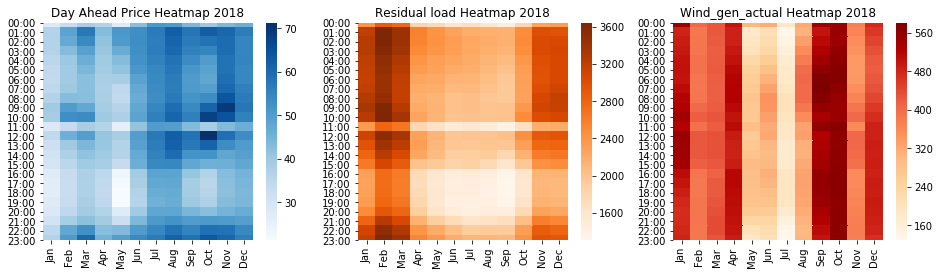

In [10]:
f, axes = plt.subplots(ncols=3, figsize=(16,4))

sns.heatmap(data=Price1, cmap="Blues", yticklabels = time, ax=axes[0])
axes[0].set_title('Day Ahead Price Heatmap 2018')

sns.heatmap(data=res_load, cmap="Oranges", yticklabels = time, ax=axes[1])
axes[1].set_title('Residual load Heatmap 2018')

sns.heatmap(data=wind_act, cmap="OrRd", yticklabels = time, ax=axes[2])
axes[2].set_title('Wind_gen_actual Heatmap 2018')


# Remove ylabel.
axes[0].set_ylabel('') 
axes[1].set_ylabel('') 
axes[2].set_ylabel('') 

plt.show()

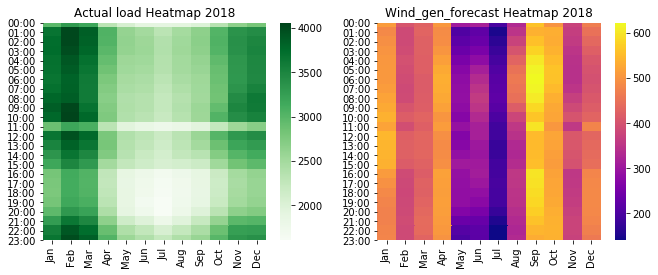

In [11]:
f, axes = plt.subplots(ncols=2, figsize=(11,4))

sns.heatmap(data=Load,cmap="Greens", yticklabels = time, ax=axes[0])
axes[0].set_title('Actual load Heatmap 2018')


sns.heatmap(data=wind_for,cmap="plasma", yticklabels = time, ax=axes[1])
axes[1].set_title('Wind_gen_forecast Heatmap 2018')


# Remove ylabel.
axes[0].set_ylabel('') 
axes[1].set_ylabel('')

plt.show()

In [3]:
df3 = df.copy()

In [4]:
df3 = df3.drop(columns=['CET_TimeStamp'])

In [5]:
df3.head()

,Actual_Total_Load,Day_Ahead_Price,Wind_Onshore_Gen_Actual,Wind_Onshore_generation_forecast,Residual_load
0,2498.0,26.33,454.0,446.0,2044.0
1,2431.0,26.43,432.0,430.0,1999.0
2,2402.0,26.10,440.0,432.0,1962.0
3,2358.0,24.70,473.0,431.0,1885.0
4,2385.0,24.74,463.0,464.0,1922.0


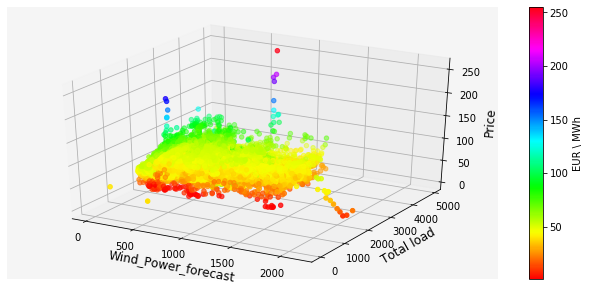

In [11]:
fig2 = plt.figure(figsize=(11,5))
ax5 = plt.axes(projection="3d")


Price = df3['Day_Ahead_Price']
wind_actual = df3['Wind_Onshore_Gen_Actual']
wind = df3['Wind_Onshore_generation_forecast']
load = df3['Residual_load']
tot_load = df3['Actual_Total_Load']
my_scatter_plot = ax5.scatter3D(wind, tot_load, Price, c=Price, cmap='hsv')

cbar = fig2.colorbar(my_scatter_plot)
cbar.set_label('EUR \ MWh')
ax5.set_xlabel('Wind_Power_forecast', color='k', fontsize=12)
ax5.set_ylabel('Total load', color='k', fontsize=12)
ax5.set_zlabel('Price', color='k', fontsize=12)

ax5.set_facecolor('whitesmoke')

#plt.savefig('2018_3Dmap.png', dpi=100)
#plt.show()
plt.show()